In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('./music_genre.csv')

In [6]:
# Clean table of instance_id, artist_name, track_name, key, mode, and obtained_date
df = df.drop(['instance_id', 'artist_name', 'track_name', 'key', 'mode', 'obtained_date', 'popularity'], axis=1)

# Clean table of songs with negative duration
negative_lengths = df[df['duration_ms'] < 0].index
df.drop(negative_lengths, inplace=True)

# Clean table of songs with unknown tempo
unknown_tempo = df[df['tempo'] == '?'].index
df.drop(unknown_tempo, inplace=True)

# Clean table of songs with NaN values
df = df.dropna()

# Round tempos
def df_value_round(x):
    x = float(x)
    return round(x)

df['tempo'] = df['tempo'].apply(df_value_round)

# convert duration_ms to durastion_secs
def ms_to_s(x):
    x = float(x)
    return x / 1000

df['duration_ms'] = df['duration_ms'].apply(ms_to_s)
df = df.rename(columns={'duration_ms': 'duration_secs'})

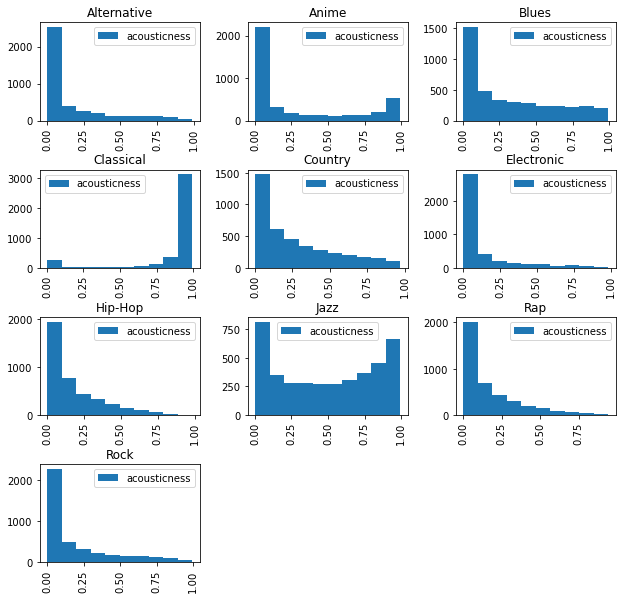

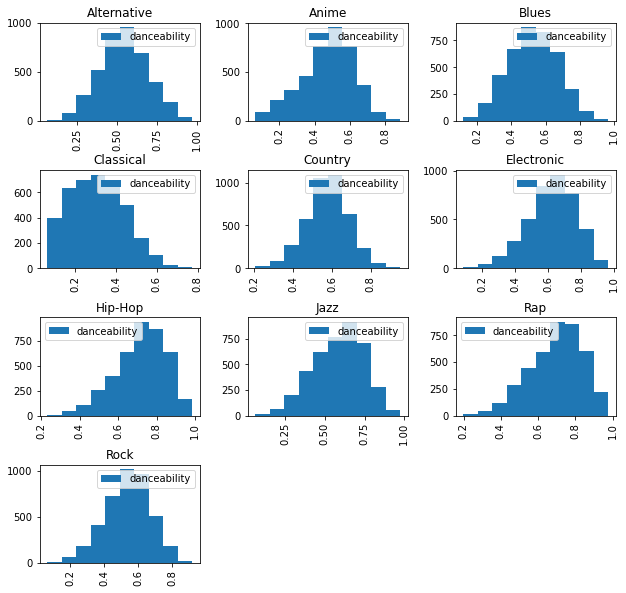

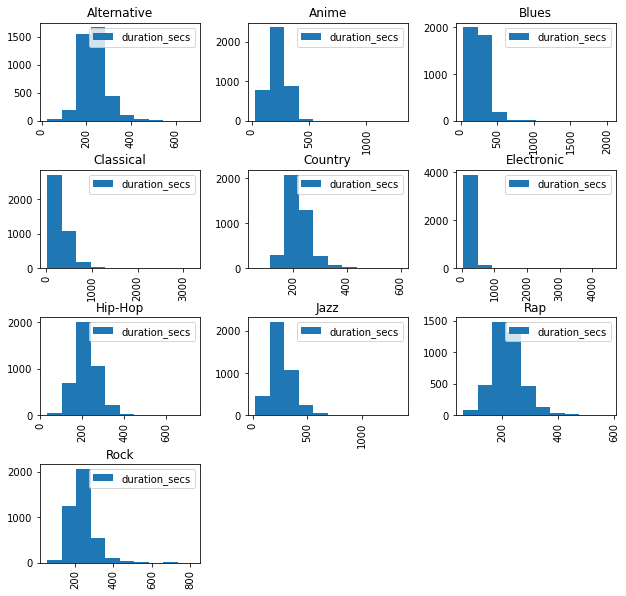

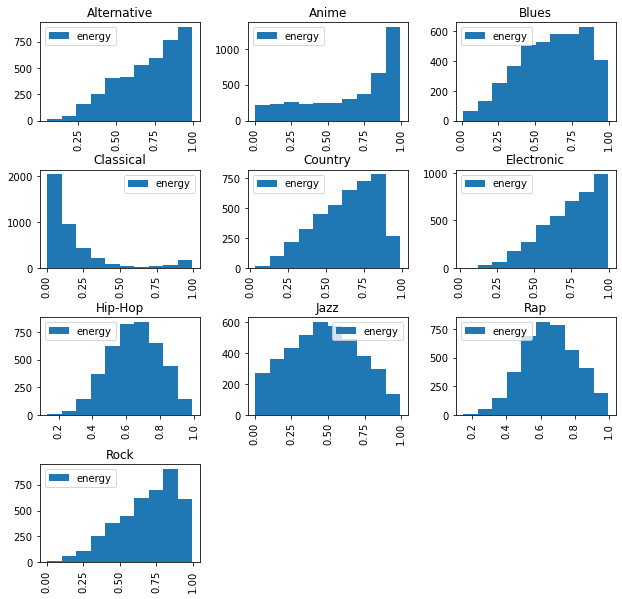

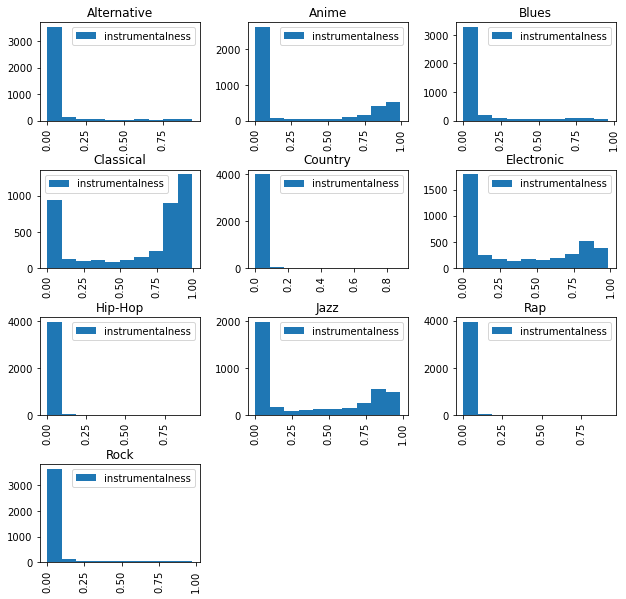

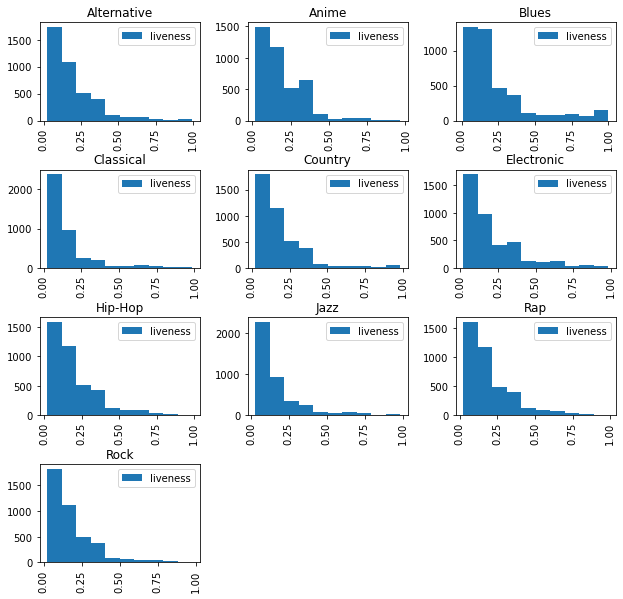

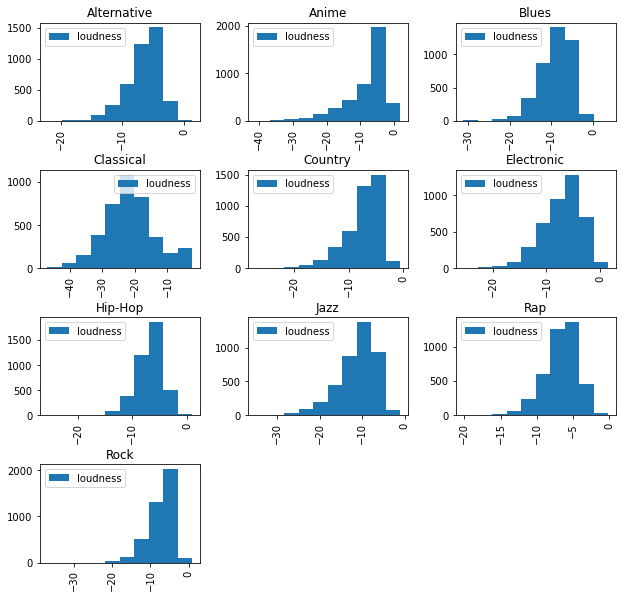

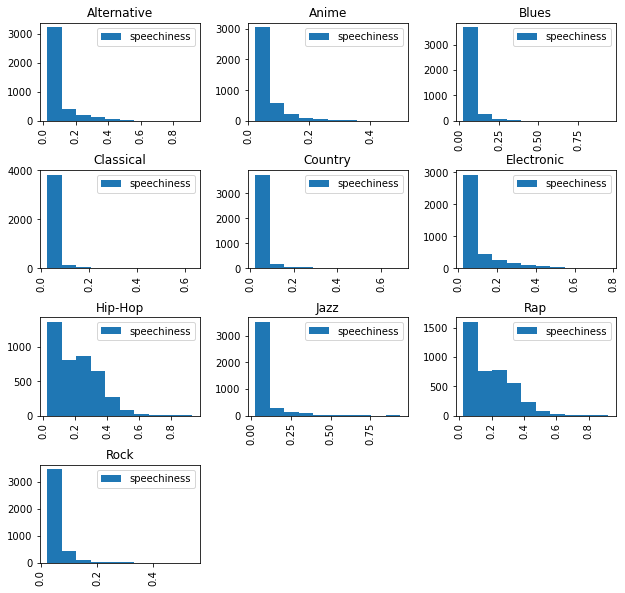

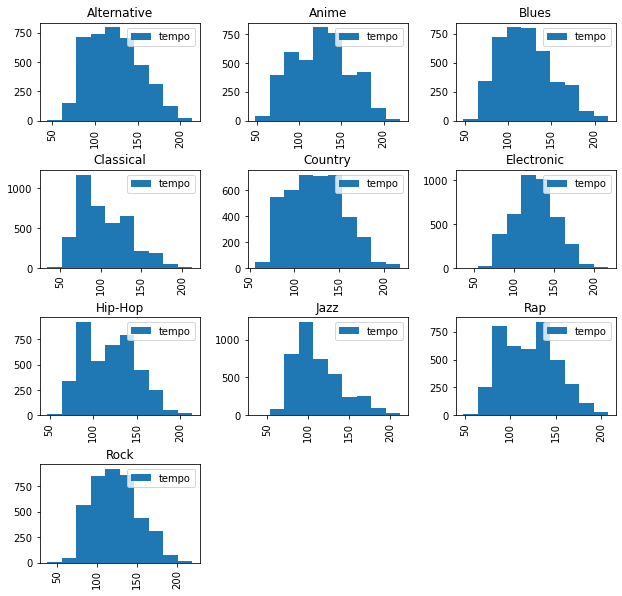

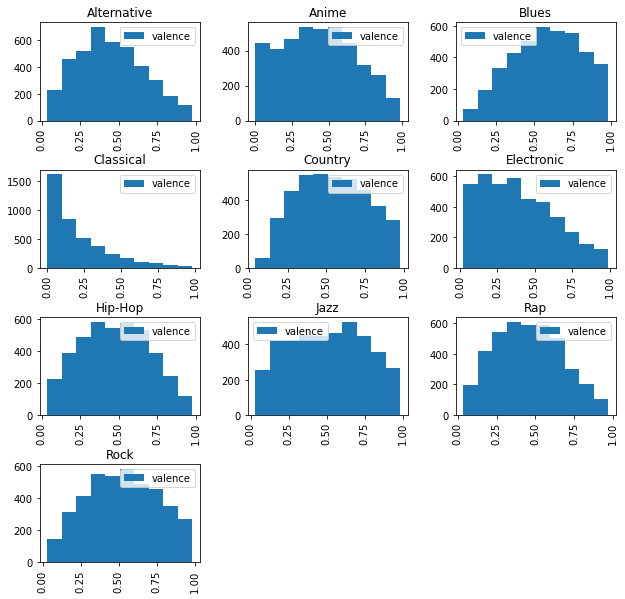

In [7]:
# histograms of each genre
training_features = df.drop(['music_genre'], axis=1)
for col in training_features:
    hist = df.hist(column=col, by=df['music_genre'], figsize=(10,10), legend=True)

In [8]:
# split data into test and train
train_df, test_df = train_test_split(df, test_size=.25, shuffle=True)

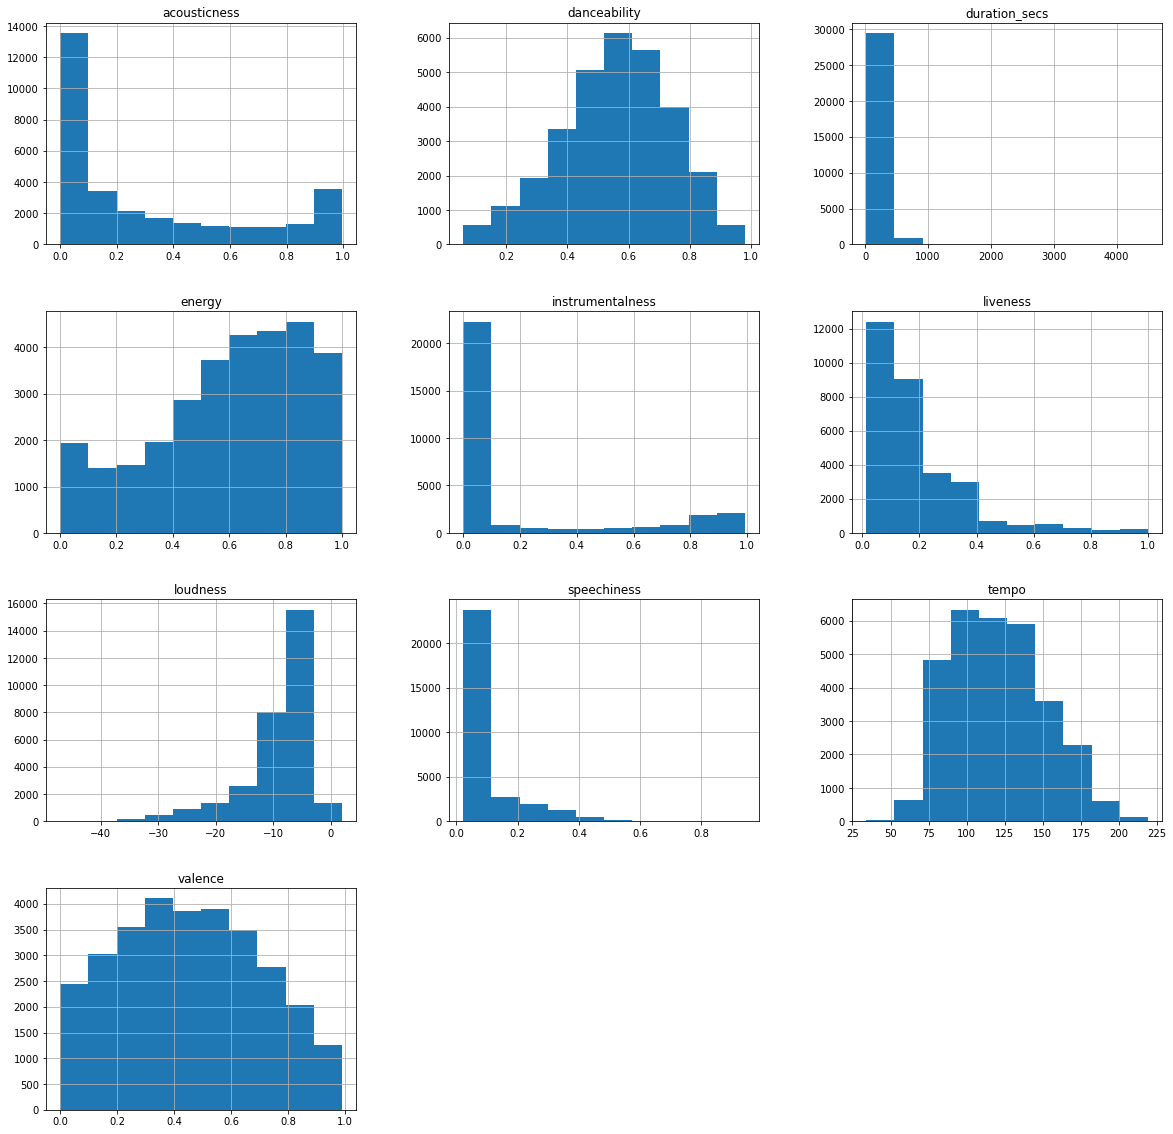

In [9]:
# histograms of training data
histograms = train_df.hist(figsize=(20, 20))

In [10]:
# Descriptive Stats - Mean
df.groupby(['music_genre']).mean()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.165818,0.543548,233.401848,0.711347,0.060642,0.196118,-6.526353,0.088907,122.406566,0.448641
Anime,0.283650,0.471435,231.378484,0.667528,0.275696,0.193509,-7.910208,0.064674,126.695128,0.436103
Blues,0.312226,0.527317,253.432844,0.612521,0.093796,0.233495,-8.949297,0.062552,121.296095,0.577852
Classical,0.870412,0.306723,310.510828,0.175664,0.603554,0.162306,-21.629532,0.051597,103.920218,0.210925
Country,0.271384,0.576436,216.708238,0.636880,0.005839,0.185417,-7.323265,0.049078,123.987651,0.537257
Electronic,0.124051,0.620173,269.823286,0.738062,0.351582,0.210307,-7.072186,0.099289,125.773810,0.391775
Hip-Hop,0.178435,0.716462,219.770170,0.647242,0.010464,0.201357,-6.821617,0.206740,119.899191,0.476371
Jazz,0.494101,0.584422,264.350729,0.473662,0.354021,0.172591,-11.182938,0.073962,111.613927,0.507923
Rap,0.171080,0.696837,219.015522,0.650704,0.008686,0.197174,-6.668378,0.187059,120.432954,0.456343


In [11]:
# Descriptive Stats - Median
df.groupby(['music_genre']).median()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.0339,0.541,226.2070,0.7480,0.000067,0.132,-5.9930,0.05230,120.0,0.432
Anime,0.0641,0.488,239.9410,0.7840,0.000405,0.137,-5.6850,0.04520,128.0,0.436
Blues,0.2030,0.529,230.3465,0.6315,0.000929,0.137,-8.3835,0.04320,118.0,0.586
Classical,0.9680,0.302,262.6760,0.0988,0.837500,0.110,-21.9225,0.04330,96.0,0.140
Country,0.1830,0.579,211.5000,0.6690,0.000000,0.127,-6.5690,0.03440,123.0,0.527
Electronic,0.0262,0.631,244.9655,0.7730,0.186000,0.128,-6.4685,0.05760,126.0,0.361
Hip-Hop,0.1070,0.731,215.0400,0.6510,0.000000,0.136,-6.4790,0.19100,120.0,0.476
Jazz,0.5095,0.600,247.6820,0.4750,0.121000,0.115,-10.3460,0.04385,105.0,0.514
Rap,0.0948,0.714,214.5335,0.6490,0.000000,0.135,-6.3655,0.16150,120.0,0.448


In [12]:
# Descriptive Stats - Standard Deviation
df.groupby(['music_genre']).median()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.0339,0.541,226.2070,0.7480,0.000067,0.132,-5.9930,0.05230,120.0,0.432
Anime,0.0641,0.488,239.9410,0.7840,0.000405,0.137,-5.6850,0.04520,128.0,0.436
Blues,0.2030,0.529,230.3465,0.6315,0.000929,0.137,-8.3835,0.04320,118.0,0.586
Classical,0.9680,0.302,262.6760,0.0988,0.837500,0.110,-21.9225,0.04330,96.0,0.140
Country,0.1830,0.579,211.5000,0.6690,0.000000,0.127,-6.5690,0.03440,123.0,0.527
Electronic,0.0262,0.631,244.9655,0.7730,0.186000,0.128,-6.4685,0.05760,126.0,0.361
Hip-Hop,0.1070,0.731,215.0400,0.6510,0.000000,0.136,-6.4790,0.19100,120.0,0.476
Jazz,0.5095,0.600,247.6820,0.4750,0.121000,0.115,-10.3460,0.04385,105.0,0.514
Rap,0.0948,0.714,214.5335,0.6490,0.000000,0.135,-6.3655,0.16150,120.0,0.448


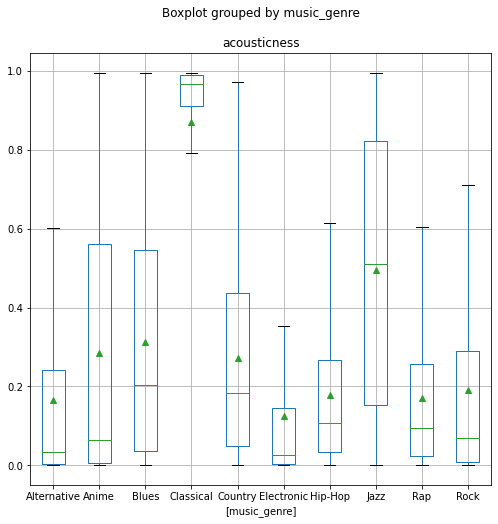

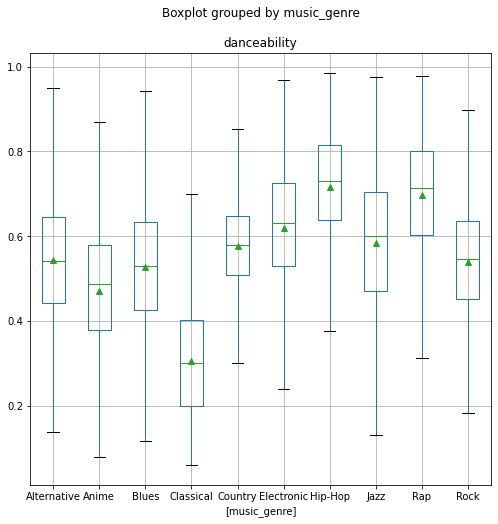

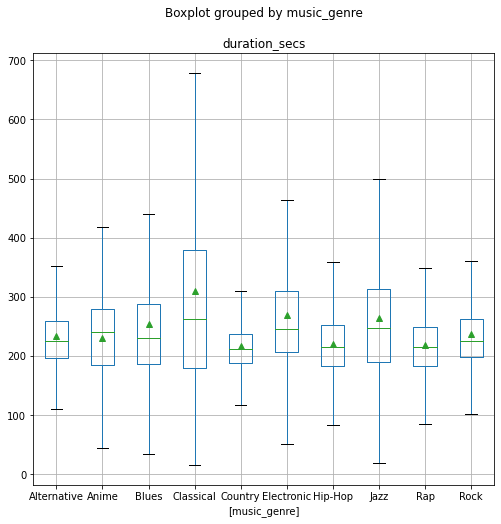

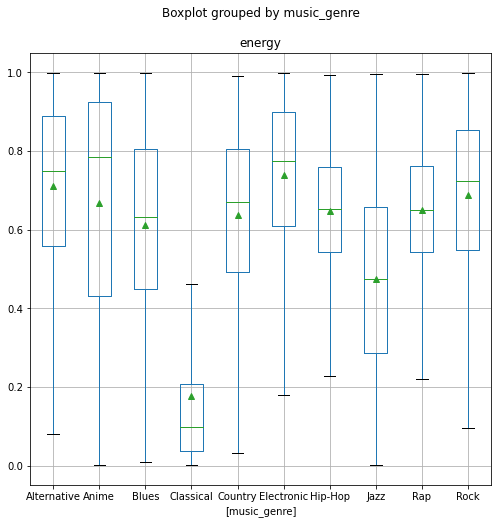

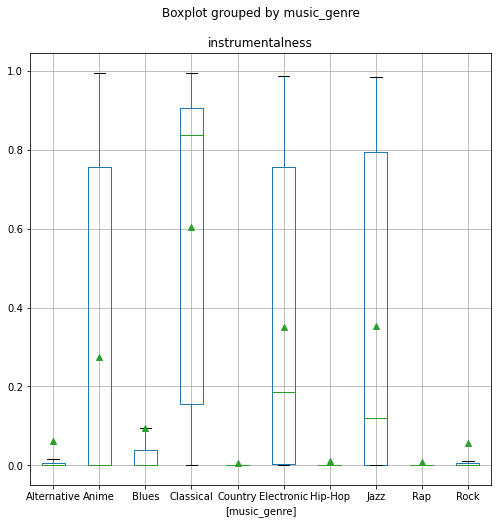

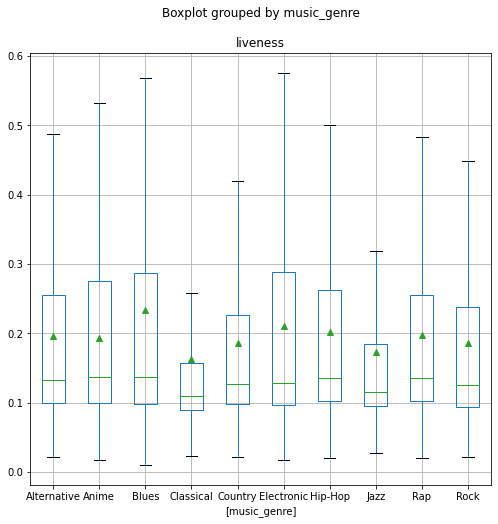

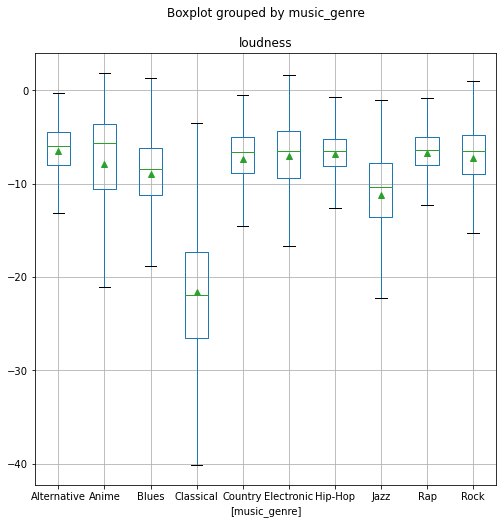

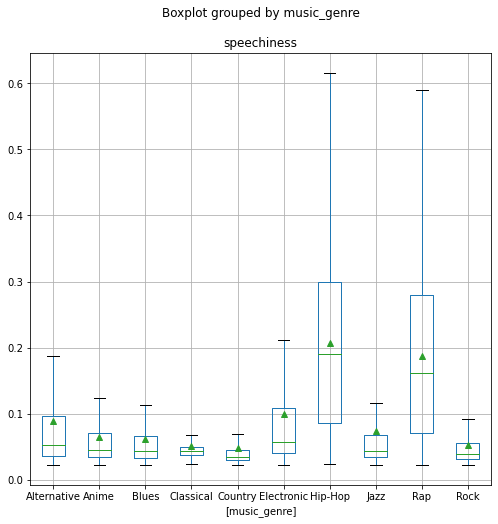

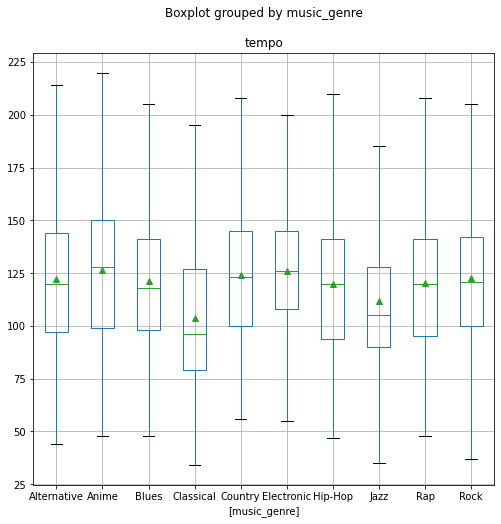

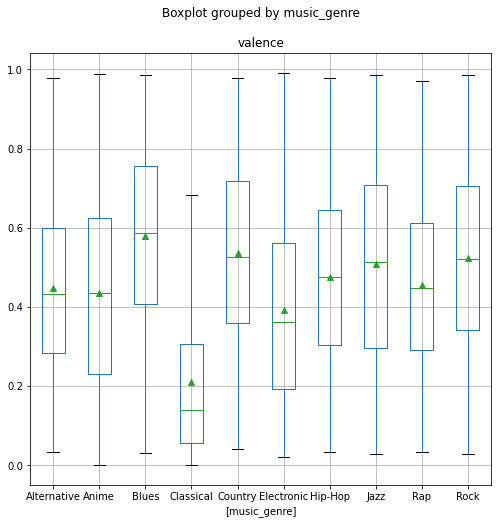

In [13]:
# Boxplots
training_features = train_df.drop(['music_genre'], axis=1)
for col in training_features:
    boxplot = df.boxplot(column=[col], by=['music_genre'], figsize=(8,8), showfliers=False, showmeans=True)

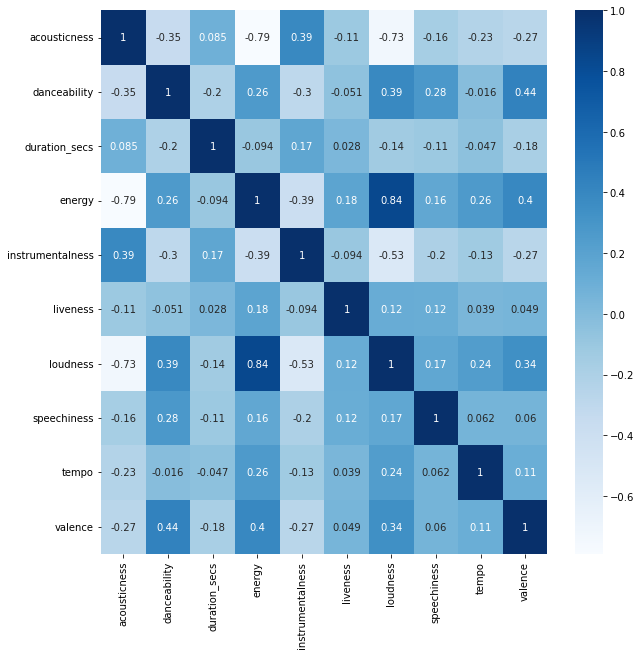

In [14]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [16]:
knn_model = KNeighborsClassifier(5)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 5:')
print(metrics.classification_report(training_labels,predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 5:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))




training set when k = 5:
              precision    recall  f1-score   support

 Alternative       0.31      0.58      0.41      3038
       Anime       0.46      0.58      0.51      3038
       Blues       0.41      0.44      0.43      3035
   Classical       0.75      0.78      0.77      3014
     Country       0.44      0.45      0.45      3015
  Electronic       0.52      0.44      0.48      3070
     Hip-Hop       0.45      0.40      0.43      3043
        Jazz       0.52      0.38      0.44      3081
         Rap       0.44      0.31      0.36      3005
        Rock       0.43      0.26      0.33      3081

    accuracy                           0.46     30420
   macro avg       0.47      0.46      0.46     30420
weighted avg       0.47      0.46      0.46     30420

[[1760  152  124   13  224  139  191  108  149  178]
 [ 362 1762  101  183   94  129  105  103   93  106]
 [ 470  242 1341   89  161  143  113  196  143  137]
 [ 102  176  138 2364   26   46   18  101   11   32]
 [ 5

In [17]:
knn_model = KNeighborsClassifier(1000)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 1000:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 1000:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))


training set when k = 1000:
              precision    recall  f1-score   support

 Alternative       0.15      0.09      0.11      3038
       Anime       0.23      0.32      0.26      3038
       Blues       0.17      0.06      0.09      3035
   Classical       0.49      0.51      0.50      3014
     Country       0.18      0.44      0.26      3015
  Electronic       0.19      0.23      0.21      3070
     Hip-Hop       0.18      0.16      0.17      3043
        Jazz       0.20      0.22      0.21      3081
         Rap       0.16      0.07      0.09      3005
        Rock       0.17      0.10      0.13      3081

    accuracy                           0.22     30420
   macro avg       0.21      0.22      0.20     30420
weighted avg       0.21      0.22      0.20     30420

[[ 262  423   60   79  902  356  279  281  143  253]
 [ 146  959   70  241  435  413  254  327   80  113]
 [ 141  347  174  228  712  420  283  406  114  210]
 [  26  266  116 1535  230  266   95  381   23   76]
 

In [18]:
knn_model = KNeighborsClassifier(1000)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 1000:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 1000:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set when k = 1000:
              precision    recall  f1-score   support

 Alternative       0.15      0.09      0.11      3038
       Anime       0.23      0.32      0.26      3038
       Blues       0.17      0.06      0.09      3035
   Classical       0.49      0.51      0.50      3014
     Country       0.18      0.44      0.26      3015
  Electronic       0.19      0.23      0.21      3070
     Hip-Hop       0.18      0.16      0.17      3043
        Jazz       0.20      0.22      0.21      3081
         Rap       0.16      0.07      0.09      3005
        Rock       0.17      0.10      0.13      3081

    accuracy                           0.22     30420
   macro avg       0.21      0.22      0.20     30420
weighted avg       0.21      0.22      0.20     30420

[[ 262  423   60   79  902  356  279  281  143  253]
 [ 146  959   70  241  435  413  254  327   80  113]
 [ 141  347  174  228  712  420  283  406  114  210]
 [  26  266  116 1535  230  266   95  381   23   76]
 

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
model = GaussianNB()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
model.fit(training_features, training_labels)
predicted = model.predict(training_features)

print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

print('testing set:')
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
predicted = model.predict(testing_features)
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.23      0.09      0.13      3038
       Anime       0.30      0.08      0.13      3038
       Blues       0.35      0.12      0.18      3035
   Classical       0.64      0.85      0.73      3014
     Country       0.22      0.83      0.35      3015
  Electronic       0.48      0.31      0.38      3070
     Hip-Hop       0.41      0.31      0.35      3043
        Jazz       0.39      0.28      0.32      3081
         Rap       0.35      0.42      0.38      3005
        Rock       0.17      0.10      0.13      3081

    accuracy                           0.34     30420
   macro avg       0.35      0.34      0.31     30420
weighted avg       0.35      0.34      0.31     30420

[[ 261   55   80   43 1594  129  178  118  261  319]
 [ 293  249   71  544 1165  153    4  177   53  329]
 [ 110  104  373  105 1472  149   52  283   70  317]
 [  38   36   24 2574   81   62    0  149    3   47]
 [  17   16   8

In [21]:
from sklearn.neighbors import NearestCentroid

In [22]:
centroid_model = NearestCentroid()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
centroid_model.fit(training_features, training_labels)

predicted = centroid_model.predict(training_features)
print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = centroid_model.predict(testing_features)
print('testing set:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.15      0.03      0.06      3038
       Anime       0.13      0.10      0.11      3038
       Blues       0.09      0.03      0.04      3035
   Classical       0.22      0.43      0.29      3014
     Country       0.13      0.40      0.19      3015
  Electronic       0.13      0.12      0.12      3070
     Hip-Hop       0.12      0.19      0.14      3043
        Jazz       0.13      0.11      0.12      3081
         Rap       0.14      0.02      0.03      3005
        Rock       0.15      0.03      0.06      3081

    accuracy                           0.14     30420
   macro avg       0.14      0.15      0.12     30420
weighted avg       0.14      0.14      0.12     30420

[[ 103  302  112  360  878  292  561  287   50   93]
 [  58  297  112  485  895  543  286  260   25   77]
 [  58  196   85  689  933  253  467  266   35   53]
 [  26   73   42 1285  741  116  467  242    4   18]
 [  76  322   8